# Baby Weights Predict
I take this dataset from freelancer website and there have separate dataset for train and test
37 colums are present in train dataset and 36 is present in test datasset. 
Objective--> My aim is to create a model with train data set 
and predict the body weight with given features. 
By importing below libaries i will start

In [1]:
#import libaries
import numpy as np                            #numpy libaries import
import pandas as pd                           #pandas libaries import
import seaborn as sns                         #seabirn liabries import
import matplotlib.pyplot as plt               #matplotlib libaries import
%matplotlib inline

#Change background colour of plot to dark
plt.style.use("dark_background")

#import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data=pd.read_csv("baby-weights-dataset.csv")                       #Import train data
test_data=pd.read_csv("judge-without-labels.csv")                        #Import test data


data=pd.concat([train_data,test_data])                                   #Concat train and test data


#display top 10 data
display(data.head(10))

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT
0,2001,2,1,33,26.0,10,34,12.0,4,2,...,0,0,0,0,0,0,0,0,0,4.3750
1,2002,2,2,19,40.0,10,18,11.0,12,1,...,0,0,0,0,0,0,0,0,0,6.9375
2,2003,2,1,33,16.0,14,31,16.0,16,2,...,0,0,0,0,0,0,0,0,0,8.5000
3,2004,1,1,25,40.0,15,28,12.0,12,3,...,0,0,0,0,0,0,0,0,0,8.5000
4,2005,1,2,21,60.0,13,20,12.0,14,2,...,0,1,0,0,0,0,0,0,0,9.0000
5,2006,1,1,21,30.0,15,21,12.0,13,1,...,0,0,0,0,0,0,0,0,0,8.0000
6,2007,1,2,29,20.0,11,32,6.0,6,2,...,0,0,0,0,0,0,0,0,0,7.0000
7,2008,2,2,23,41.0,15,21,13.0,13,1,...,0,0,0,0,0,0,0,0,0,7.3750
8,2009,2,1,27,0.0,12,26,10.0,13,1,...,0,0,0,0,0,0,0,0,0,8.1875
9,2010,1,1,30,30.0,10,22,12.0,14,3,...,0,0,0,0,0,0,0,0,0,7.0625


In [3]:
information=data.info()                          #data info

data_statistics=data.describe()                  #statistics of data

missing_values=data.isnull().sum()               #summation of missing values


print("Information of data:",information)
print("Statitics of variables:",data_statistics)
print("Missing values of each variables:",missing_values)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103400 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        103400 non-null  int64  
 1   SEX       103400 non-null  int64  
 2   MARITAL   103400 non-null  int64  
 3   FAGE      103400 non-null  int64  
 4   GAINED    103399 non-null  float64
 5   VISITS    103400 non-null  int64  
 6   MAGE      103400 non-null  int64  
 7   FEDUC     103399 non-null  float64
 8   MEDUC     103400 non-null  int64  
 9   TOTALP    103400 non-null  int64  
 10  BDEAD     103400 non-null  int64  
 11  TERMS     103400 non-null  int64  
 12  LOUTCOME  103400 non-null  int64  
 13  WEEKS     103399 non-null  float64
 14  RACEMOM   103400 non-null  int64  
 15  RACEDAD   103400 non-null  int64  
 16  HISPMOM   103400 non-null  object 
 17  HISPDAD   103400 non-null  object 
 18  CIGNUM    103399 non-null  float64
 19  DRINKNUM  103400 non-null  int64  
 20  ANEMIA

In [4]:
#Observation-- In this dataset all variables are numerical there have two categorical variable
#-In 5 colums have 1 ,1 missing value.
#So, let's fixed those missing value

Text(0.5, 1.0, 'Count plot of FEDUC')

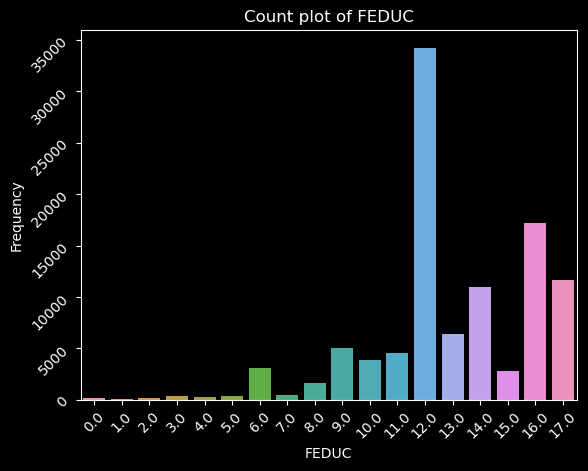

In [5]:
#Count plot of FEDUC
sns.countplot(x="FEDUC",data=data)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylabel("Frequency")
plt.title('Count plot of FEDUC')

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

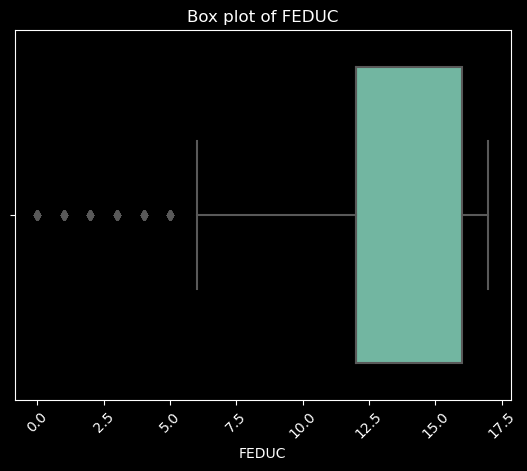

In [6]:
#Boxplot to chekc outlier
sns.boxplot(x=data["FEDUC"], palette="Set2")
plt.title("Box plot of FEDUC")
plt.xticks(rotation=45)

In [7]:
#Observation-- there have few outliers in FEDUC variables so i will use 
#median to fill the missing value (and median and mode of theis variable is same)

tmp = (pd.isna(data["FEDUC"]))
data.FEDUC[tmp] = 12
print("Fixed FEDUC missing value: ",tmp.sum())


print("Missing values left to fixed :",data.FEDUC.isnull().sum())

Fixed FEDUC missing value:  1
Missing values left to fixed : 0


Text(0.5, 1.0, 'Count plot of GAINED')

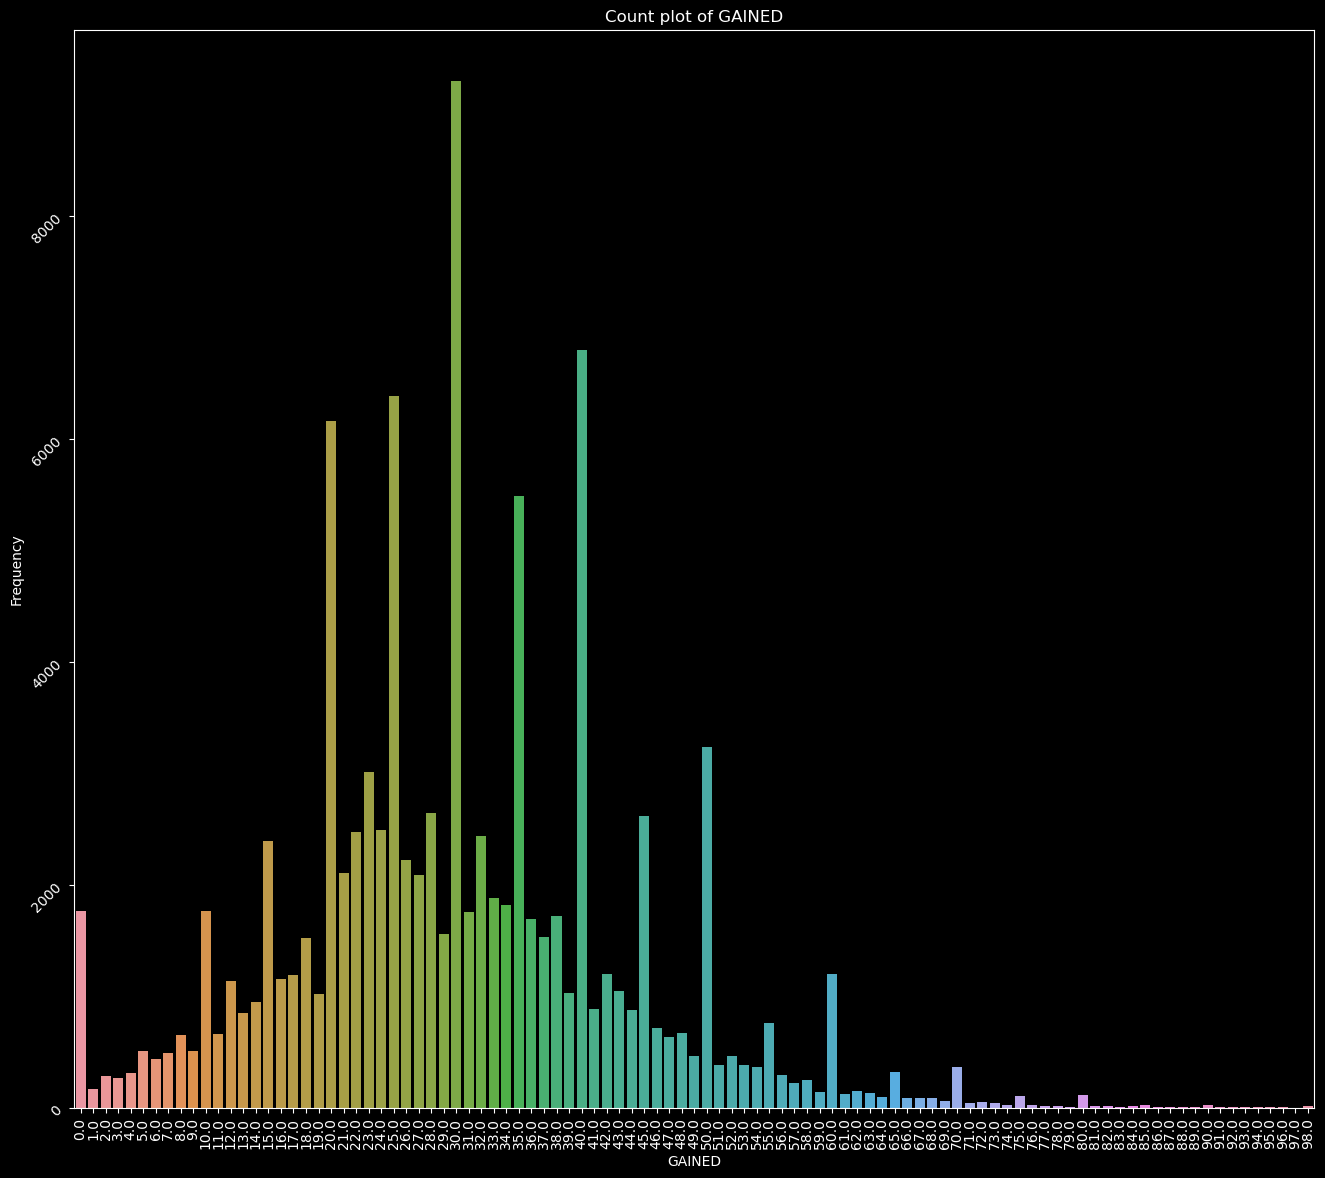

In [8]:
#Count plot of GAINED
plt.figure(figsize=(16,14))
sns.countplot(x="GAINED",data=data)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.ylabel("Frequency")
plt.title('Count plot of GAINED')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

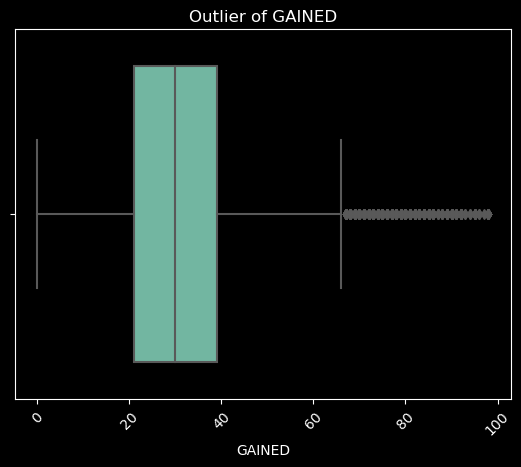

In [9]:
#Boxplot to chekc outlier
sns.boxplot(x=data["GAINED"], palette="Set2")
plt.title("Outlier of GAINED")
plt.xticks(rotation=45)

In [10]:
#Observation there have so much outlier in gained variable so we can't use mean
#so, i will fixed missing values with mode or most frequent value 

In [11]:
#Fix missing values of GAINED variables

tmp = (pd.isna(data["GAINED"]))
data.GAINED[tmp] = 30
print("Fixed missing values of GAINED:",tmp.sum())

print("Missing values left to fixed:",data.GAINED.isnull().sum())

Fixed missing values of GAINED: 1
Missing values left to fixed: 0


Text(0.5, 1.0, 'Count plot of WEEKS')

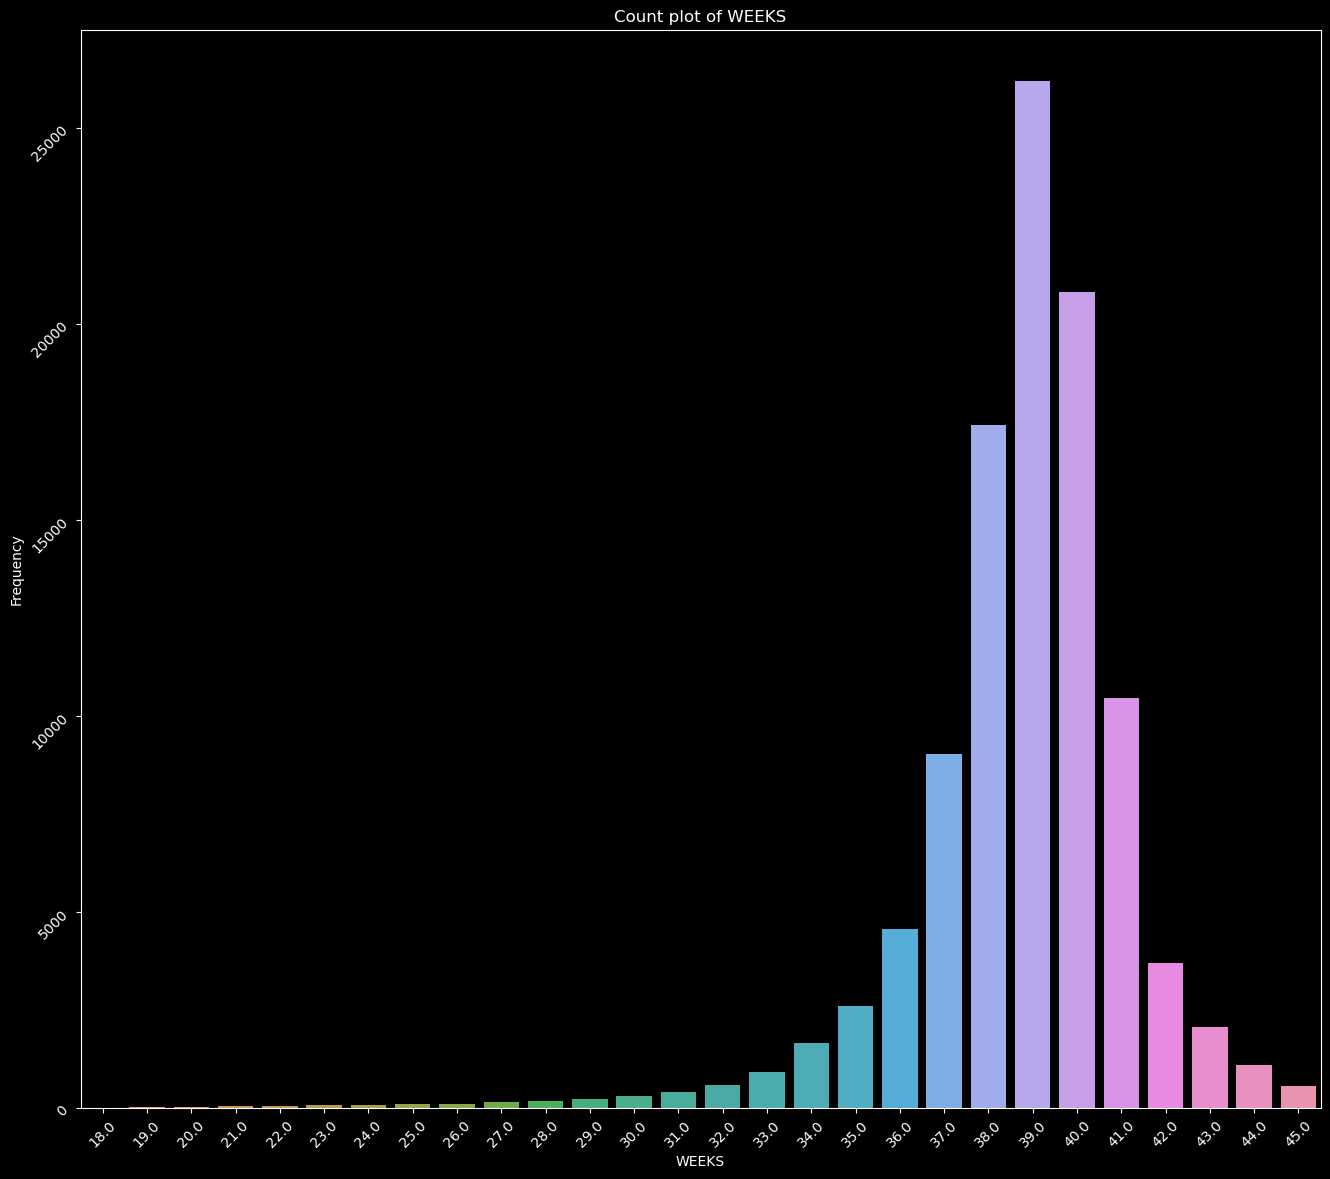

In [12]:
#Count plot of WEEKS
plt.figure(figsize=(16,14))
sns.countplot(x="WEEKS",data=data)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylabel("Frequency")
plt.title('Count plot of WEEKS')

(array([15., 20., 25., 30., 35., 40., 45., 50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

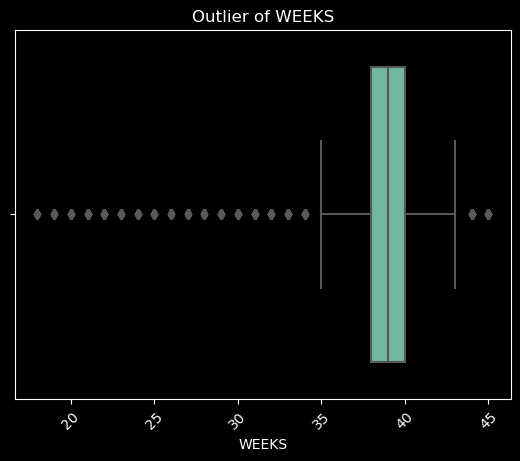

In [13]:
#Boxplot to chekc outlier
sns.boxplot(x=data["WEEKS"], palette="Set2")
plt.title("Outlier of WEEKS")
plt.xticks(rotation=45)

In [14]:
#Observation--- In this column have so much outlier
#I will fixed the missing values with median

In [15]:
#Fix WEEKS variables missing values

tmp = (pd.isna(data["WEEKS"]))
data.WEEKS[tmp] = 39
print("Fixed missing values:",tmp.sum())

print("Missing values left to fixed:",data.WEEKS.isnull().sum())

Fixed missing values: 1
Missing values left to fixed: 0


Text(0.5, 1.0, 'Count plot of CIGNUM')

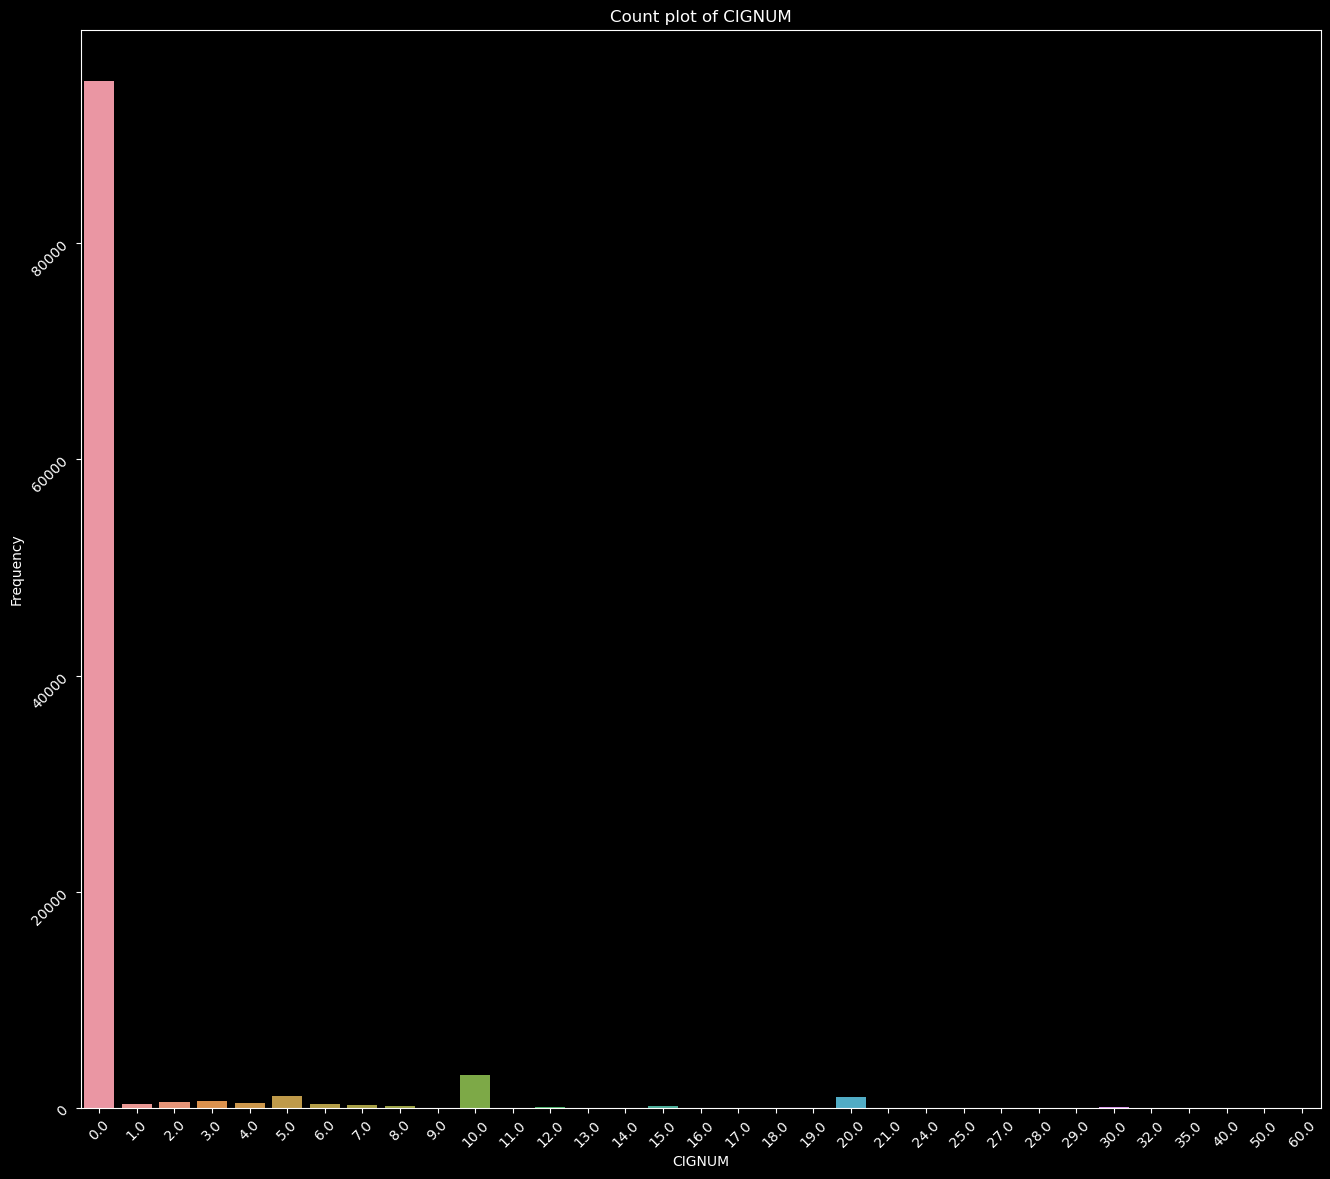

In [16]:
#Now for CIGNUM variable
#Count plot of CIGNUM
plt.figure(figsize=(16,14))
sns.countplot(x="CIGNUM",data=data)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylabel("Frequency")
plt.title('Count plot of CIGNUM')

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

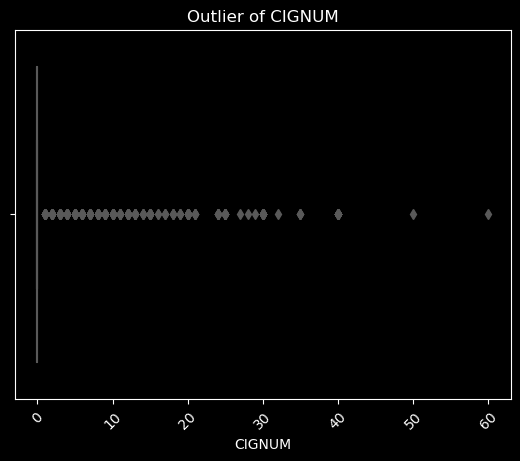

In [17]:
#Boxplot to chekc outlier
sns.boxplot(x=data["CIGNUM"], palette="Set2")
plt.title("Outlier of CIGNUM")
plt.xticks(rotation=45)

In [18]:
#Observation --most of the value is 0 of this column
#from count plot we can see that 
#so will fix missing values with most frequent values of this column

#fix missing values of CIGNUM column

tmp = (pd.isna(data["CIGNUM"]))
data.CIGNUM[tmp] = 0
print("Fixed missing values:",tmp.sum())

print("Missing values left to fixed;",data.CIGNUM.isnull().sum())

Fixed missing values: 1
Missing values left to fixed; 0


Text(0.5, 1.0, 'Count plot of HYDRAM')

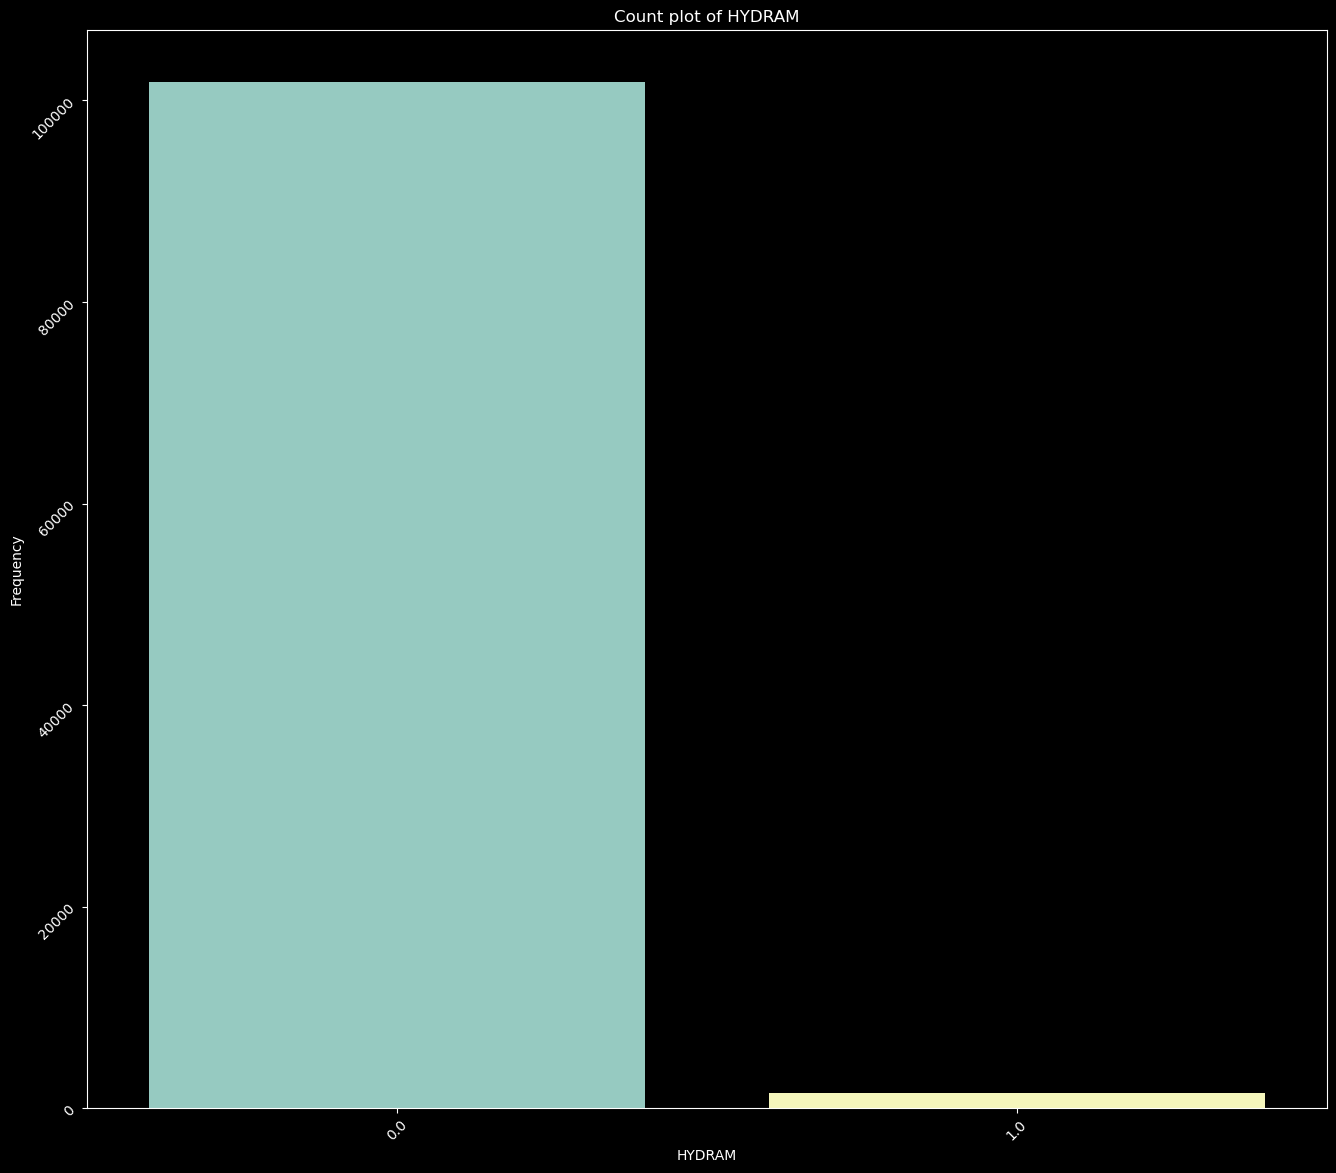

In [19]:
#Now for HYDRAM variable
#Count plot of HYDRAM
plt.figure(figsize=(16,14))
sns.countplot(x="HYDRAM",data=data)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylabel("Frequency")
plt.title('Count plot of HYDRAM')

In [20]:
#Observation-- from above count plot we can see that most of the values lies on 0
#so i will fixed missing values of HYDRAM column with 0(most frequent values)

#fix missing values of HYDRAM variavles

tmp = (pd.isna(data["HYDRAM"]))
data.HYDRAM[tmp] = 0
print("Fixed missing values:",tmp.sum())

print("Missing values left to fixed:",data.HYDRAM.isnull().sum())

Fixed missing values: 1
Missing values left to fixed: 0


In [21]:
#in this dataset have two object type variable 

#Create dummies of HISPMOM column and concat to dataset
hispmom=pd.get_dummies(data["HISPMOM"],drop_first=True)
data=pd.concat([data,hispmom],axis=1)

#Create dummies of HISPDAD column and concat to dataset
hispdad=pd.get_dummies(data["HISPDAD"],drop_first=True)
data=pd.concat([data,hispdad],axis=1)

#Drop of actual column and drop id column also beacuse id column consist of unique values 
df=data.drop(columns={"HISPMOM","HISPDAD","ID"},axis=1)

# Train Test Split

In [22]:
#Seperate features and labels
x = df.drop("BWEIGHT",axis=1)
y = df["BWEIGHT"]
print("Features and labels separation done!")

#train test split
xx_train = x.iloc[:101400,:]
x_val = x.iloc[101401:103400,:]
yy_train = y.iloc[:101400]                      #Test data for predict dont have labels 

#from train data set let's separate some data for checking accuracy cuz dont have test data labels
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xx_train,yy_train,test_size=0.1,random_state=42)
print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

print("Train test split done!")

Features and labels separation done!
Shape of x_train: (91260, 45)
Shape of x_test: (10140, 45)
Shape of y_train: (91260,)
Shape of y_test: (10140,)
Train test split done!


# Standard Scaling

In [23]:
#Scaling the features-->
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#fitfeatures data into standard scale
scaler.fit_transform(x_train)                     #standard scaling of x_train
scaler.transform(x_test)                          #standard scaling of x_test
scaler.transform(x_val)                           #standard scaling of x_val

array([[ 1.02606986,  1.51518139, -1.35236236, ..., -0.09380341,
        -0.19668784, -0.031244  ],
       [ 1.02606986, -0.65998699, -1.20475022, ..., -0.09380341,
        -0.19668784, -0.031244  ],
       [ 1.02606986, -0.65998699, -0.90952595, ..., -0.09380341,
        -0.19668784, -0.031244  ],
       ...,
       [-0.97220448, -0.65998699, -0.17146526, ..., -0.09380341,
        -0.19668784, -0.031244  ],
       [-0.97220448, -0.65998699,  1.00943183, ..., -0.09380341,
        -0.19668784, -0.031244  ],
       [-0.97220448,  1.51518139, -0.02385312, ..., -0.09380341,
        -0.19668784, -0.031244  ]])

# Model Build

In [24]:
#Algorithm import
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

model = LinearRegression()                    #LinearRegression algorithm
#model = LogisticRegression()                 #LogisticRegression algorithm
#model = RandomForestRegressor()              #RandomForestRegression algorithm

model.fit(x_train,y_train)                     #tarin data fit to the mdoel

#Prediction for test data
prediction = model.predict(x_test)              #prediction on test data

# Accuracy Check

In [25]:
from sklearn.metrics import r2_score             #r2 score check

r2 = r2_score(y_test,prediction)*100
print("r2 score of the model is:",r2)
#if r2 >=90:
#    print("This model is performing outstanding!!")
#elif r2 >=80 & r2 < 90:
#    print("This model is performing good!!")
#else:
#    print("This model is okay, try to improve it!!")
    

from sklearn.metrics import mean_absolute_error        #mean absolute erroe import
from sklearn.metrics import mean_squared_error         #mean squared error import
#from sklearn.metrics import accuracy_score             #accuracy score import

#accuracy = accuracy_score(y_test,prediction)*100                         #accuracy calculation
mean_abs = mean_absolute_error(y_test,prediction)                       #mean absolute error calculation
mean_sqr = mean_squared_error(y_test,prediction)                        #mean squared error calculation
mean_sqr_root = np.sqrt(mean_squared_error(y_test,prediction))          #mean squared root error calculation

#print all the errors
#print(f"Accuracy of the model:",accyracy)
print(f"Mean absolute error of the model:",mean_abs)
print(f"Mean squared error of the model:",mean_sqr)
print(f"Mean sqyared root error of the model:",mean_sqr_root)
print("All error calculation done!!")

r2 score of the model is: 38.913263525480225
Mean absolute error of the model: 0.8134145775826481
Mean squared error of the model: 1.0876525941851043
Mean sqyared root error of the model: 1.0429058414761634
All error calculation done!!


In [47]:
#prediction for user given data-->

predict = model.predict(x_val)
predict
#now create a dataset of id and predicted value of the id
#slice id from user given test dataset           
#new_id=data.iloc[101401:103400,:1]                             #labels for id columns

#create dataset
#final_prediction = pd.DataFrame({"ID":new_id,"BWEIGHTS(predicted)":predict})
#final_prediction

array([7.32488692, 6.39106031, 7.29610312, ..., 7.89100498, 7.40520964,
       5.75562807])